In [1]:
from pytorch3dunet.unet3d.config import load_config
import argparse
from pytorch3dunet.datasets.utils import get_train_loaders
from pytorch3dunet.unet3d.losses import get_loss_criterion
from pytorch3dunet.unet3d.metrics import get_evaluation_metric
from pytorch3dunet.unet3d.model import get_model
from pytorch3dunet.unet3d.utils import get_logger, get_tensorboard_formatter, create_optimizer, \
    create_lr_scheduler, get_number_of_learnable_parameters
from pytorch3dunet.unet3d.trainer import create_trainer
import torch


%load_ext autoreload
%autoreload 2

c:\Users\lazar\miniconda3\envs\cut_yeaz_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config_path = 'C:/Users/lazar/Workspace/Yeaz/3D_UNET/pytorch-3dunet/resources/3DUnet_lightsheet_nuclei/train_config.yaml'
config = load_config(config_path)
# Create the model
model = get_model(config['model'])
# use DataParallel if more than 1 GPU available
device = config['device']
if torch.cuda.device_count() > 1 and not device.type == 'cpu':
    model = nn.DataParallel(model)
    logger.info(f'Using {torch.cuda.device_count()} GPUs for training')
# put the model on GPUs
logger = get_logger('UNet3DTrainer')
logger.info(f"Sending the model to '{config['device']}'")
model = model.to(device)

2022-08-17 18:37:05,209 [MainThread] INFO ConfigLoader - Using 'cuda:0' device
2022-08-17 18:37:05,272 [MainThread] INFO UNet3DTrainer - Sending the model to 'cuda:0'


In [3]:
# # Create loss criterion
# loss_criterion = get_loss_criterion(config)
# # Create evaluation metric
# eval_criterion = get_evaluation_metric(config)

# # Create the optimizer
# optimizer = create_optimizer(config['optimizer'], model)

# # Create learning rate adjustment strategy
# lr_scheduler = create_lr_scheduler(config.get('lr_scheduler', None), optimizer)

# trainer_config = config['trainer']
# # Create tensorboard formatter
# tensorboard_formatter = get_tensorboard_formatter(trainer_config.pop('tensorboard_formatter', None))
# # Create trainer
# resume = trainer_config.pop('resume', None)
# pre_trained = trainer_config.pop('pre_trained', None)

In [4]:
# # Create data loaders
# loaders = get_train_loaders(config)

In [5]:
trainer = create_trainer(config)

2022-08-17 18:37:08,365 [MainThread] INFO UNet3DTrainer - Sending the model to 'cuda:0'
2022-08-17 18:37:08,389 [MainThread] INFO UNet3DTrainer - Number of learnable params 4081277
2022-08-17 18:37:08,391 [MainThread] INFO Dataset - Creating training and validation set loaders...
2022-08-17 18:37:23,416 [MainThread] INFO Dataset - Number of workers for train/val dataloader: 0
2022-08-17 18:37:23,417 [MainThread] INFO Dataset - Batch size for train/val loader: 1
2022-08-17 18:37:23,420 [MainThread] INFO UNet3DTrainer - UNet3D(
  (encoders): ModuleList(
    (0): Encoder(
      (basic_module): DoubleConv(
        (SingleConv1): SingleConv(
          (groupnorm): GroupNorm(1, 1, eps=1e-05, affine=True)
          (conv): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
        (SingleConv2): SingleConv(
          (groupnorm): GroupNorm(8, 16, eps=1e-05, affine=True)
          (conv): Conv3d(16, 32, kernel_si

In [6]:
trainer.fit()

2022-08-17 18:37:33,116 [MainThread] INFO UNet3DTrainer - Training iteration [1/60000]. Epoch [0/199]
2022-08-17 18:37:45,689 [MainThread] INFO UNet3DTrainer - Training iteration [2/60000]. Epoch [0/199]
2022-08-17 18:37:46,804 [MainThread] INFO UNet3DTrainer - Training iteration [3/60000]. Epoch [0/199]
2022-08-17 18:37:47,898 [MainThread] INFO UNet3DTrainer - Training iteration [4/60000]. Epoch [0/199]
2022-08-17 18:37:49,027 [MainThread] INFO UNet3DTrainer - Training iteration [5/60000]. Epoch [0/199]
2022-08-17 18:37:50,142 [MainThread] INFO UNet3DTrainer - Training iteration [6/60000]. Epoch [0/199]


KeyboardInterrupt: 

In [8]:
torch.save(trainer.model.state_dict(), 'model_9_12100steps')

In [7]:
loaders = trainer.loaders

In [9]:
import matplotlib.pyplot as plt
loaders['train'].dataset[2][1].shape

torch.Size([2, 1, 256, 256])

In [15]:
trainer.model(iter(loaders['train']).next()[0].cp.shape

torch.Size([1, 1, 256, 256, 1])

In [22]:
im, mask = iter(loaders['train']).next()

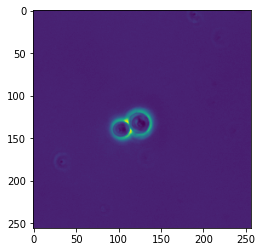

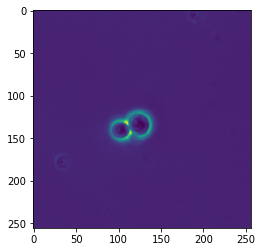

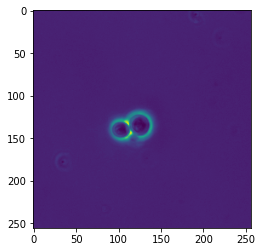

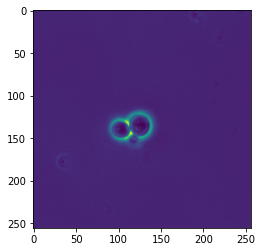

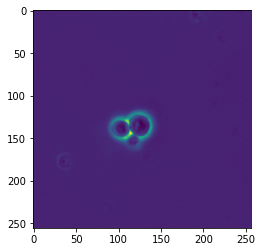

In [26]:
for i in range(5):
    plt.imshow(im[0,0,i,:,:])
    plt.show()

In [35]:
plt.imshow(mask[0,0,0,:,:])

tensor(1.)

In [34]:
trainer.model(im.cuda()).cpu().detach()[0,0,0,:,:].min()

tensor(-13.3527)

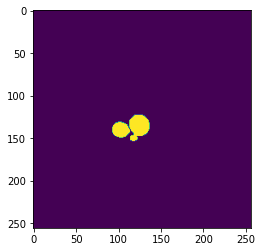

In [29]:
plt.imshow(trainer.model(im.cuda()).cpu().detach()[0,0,0,:,:]>0.5)

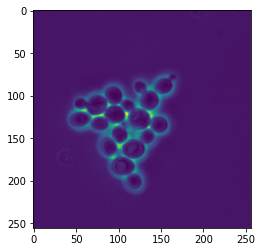

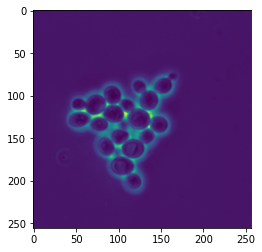

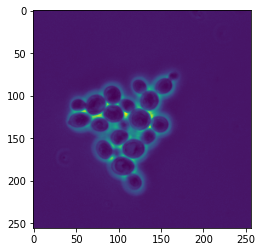

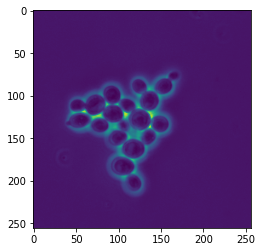

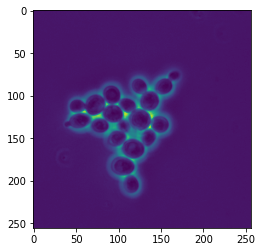

In [23]:
for i in range(5):
    plt.imshow(loaders['train'].dataset[3][0][0,:,:,i])
    plt.show()

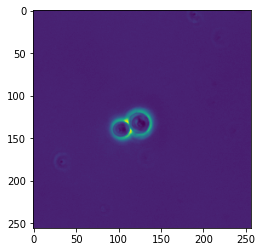

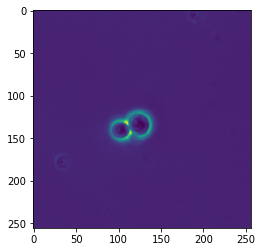

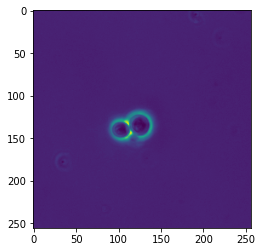

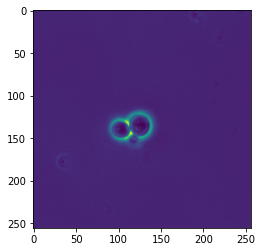

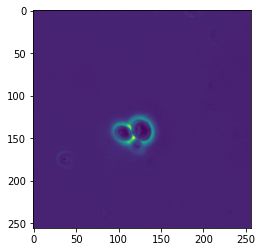

In [24]:
for i in range(5):
    plt.imshow(iter(loaders['train']).next()[0][0,0,:,:,i])
    plt.show()

In [57]:
iter(loaders['train']).next()[0].shape

torch.Size([1, 1, 5, 256, 256])

In [58]:
import h5py
filename = "./resources/sample_ovule.h5"
with h5py.File(filename, "r") as f:
    raw = list(f['raw'])

In [11]:
import numpy as np
np.array(raw).shape

NameError: name 'raw' is not defined

In [22]:
im = np.load('C:/Users/lazar/Workspace/Yeaz/3D_UNET/data_new/train/images/200917_JK_MS133-0003_Position(1)_crop_1_im_104.npy')

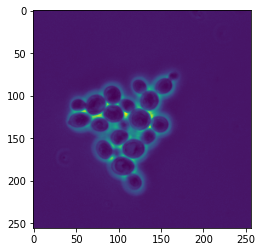

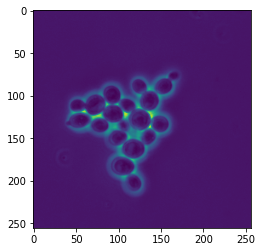

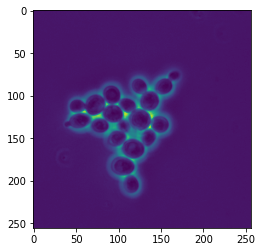

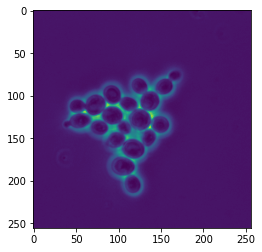

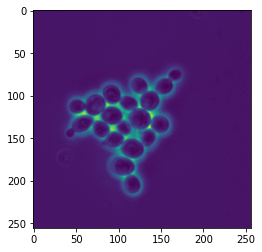

In [23]:
for i in range(5):
    plt.imshow(im[i,:,:])
    plt.show()